# Chicago Car Crashes

**By Yamuna Umapathy & Lotus Baumgarner**

## Business Problem:

This project is about finding the primary contributory causes of car accidents in one of the most busiest city Chicago. Sources say Weather conditions, Heavy Traffic in Peak Hours, Vehicle Condition, Other driver's improper driving behaviours, Late night drivings, Texting while driving are some of the factors which causes car crashes.

Insurance Carriers implementing Good Driving behaviours through their Telematic programs by offering discounts for Consumer's Auto insurance rates, also an alternate technique to reduce Carrier's Loss ratio by reducing car crashes. 

## Dataset:

The dataset comes from Chicago Data Portal https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if/about_data 
This dataset contains 810K rows and 48 columns excluding consumer's personally identifiable information. About half of all crash reports, mostly minor crashes, are self-reported at the police district by the driver(s) involved and the other half are recorded at the scene by the police officer responding to the crash. Many of the crash parameters, including street condition data, weather condition, and posted speed limits, are recorded by 
the reporting officer based on best available information at the time during the crash. 

## 1. Data Exploration & Data Cleaning:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams['figure.figsize'] = [8, 10]

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

from xgboost import XGBClassifier

from sklearn import set_config
set_config(display='diagram')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
crash_df = pd.read_csv('data\Traffic_Crashes.csv')
crash_df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,9/5/2023 19:05,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,9/22/2023 18:45,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,7/29/2023 14:45,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,8/9/2023 23:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,8/18/2023 12:50,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


In [3]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814170 entries, 0 to 814169
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                814170 non-null  object 
 1   CRASH_DATE_EST_I               60890 non-null   object 
 2   CRASH_DATE                     814170 non-null  object 
 3   POSTED_SPEED_LIMIT             814170 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         814170 non-null  object 
 5   DEVICE_CONDITION               814170 non-null  object 
 6   WEATHER_CONDITION              814170 non-null  object 
 7   LIGHTING_CONDITION             814170 non-null  object 
 8   FIRST_CRASH_TYPE               814170 non-null  object 
 9   TRAFFICWAY_TYPE                814170 non-null  object 
 10  LANE_CNT                       199008 non-null  float64
 11  ALIGNMENT                      814170 non-null  object 
 12  ROADWAY_SURFACE_COND          

In [4]:
crash_df.isnull().sum()

CRASH_RECORD_ID                       0
CRASH_DATE_EST_I                 753280
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         615162
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       24146
CRASH_TYPE                            0
INTERSECTION_RELATED_I           627422
NOT_RIGHT_OF_WAY_I               776613
HIT_AND_RUN_I                    559380
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0
STREET_DIRECTION                      4


In [5]:
print(crash_df['TRAFFIC_CONTROL_DEVICE'].value_counts())
print("\n",crash_df['WEATHER_CONDITION'].value_counts())
print("\n",crash_df['LIGHTING_CONDITION'].value_counts())
print("\n",crash_df['FIRST_CRASH_TYPE'].value_counts())
print("\n",crash_df['TRAFFICWAY_TYPE'].value_counts())
print("\n",crash_df['DAMAGE'].value_counts())
print("\n",crash_df['PRIM_CONTRIBUTORY_CAUSE'].value_counts())
print("\n",crash_df['MOST_SEVERE_INJURY'].value_counts())
print("\n",crash_df['ROAD_DEFECT'].value_counts())
print("\n",crash_df['CRASH_TYPE'].value_counts())

TRAFFIC_CONTROL_DEVICE
NO CONTROLS                 462844
TRAFFIC SIGNAL              225686
STOP SIGN/FLASHER            80833
UNKNOWN                      32606
OTHER                         5525
LANE USE MARKING              1226
YIELD                         1199
OTHER REG. SIGN                904
OTHER WARNING SIGN             667
RAILROAD CROSSING GATE         530
PEDESTRIAN CROSSING SIGN       511
FLASHING CONTROL SIGNAL        325
DELINEATORS                    321
SCHOOL ZONE                    307
POLICE/FLAGMAN                 276
OTHER RAILROAD CROSSING        181
RR CROSSING SIGN               153
NO PASSING                      51
BICYCLE CROSSING SIGN           25
Name: count, dtype: int64

 WEATHER_CONDITION
CLEAR                       638519
RAIN                         71238
UNKNOWN                      44852
SNOW                         28227
CLOUDY/OVERCAST              24111
OTHER                         2592
FREEZING RAIN/DRIZZLE         1694
FOG/SMOKE/HAZE       

In [6]:
print(crash_df['CRASH_HOUR'].value_counts())
print("\n",crash_df['CRASH_DAY_OF_WEEK'].value_counts())
print("\n",crash_df['CRASH_MONTH'].value_counts())

CRASH_HOUR
15    62836
16    62169
17    60615
14    54526
18    50007
13    49398
12    47751
8     43025
11    41277
9     37339
10    37023
19    36939
7     34396
20    29746
21    26605
22    24453
23    21188
6     17714
0     17658
1     15139
2     13031
5     11240
3     10625
4      9470
Name: count, dtype: int64

 CRASH_DAY_OF_WEEK
6    132257
7    120585
5    116787
3    116120
4    115269
2    112002
1    101150
Name: count, dtype: int64

 CRASH_MONTH
10    76798
9     72415
8     70898
12    70823
11    69260
7     68963
6     67558
5     66529
1     66044
2     65251
3     62467
4     57164
Name: count, dtype: int64


In [7]:
print(crash_df['LATITUDE'].value_counts())
print("\n",crash_df['LONGITUDE'].value_counts())
print("\n",crash_df['LOCATION'].value_counts())

LATITUDE
41.976201    1298
41.900959     756
41.791420     576
41.751461     553
41.722257     442
             ... 
41.886537       1
41.749881       1
41.708042       1
41.932034       1
41.865758       1
Name: count, Length: 297758, dtype: int64

 LONGITUDE
-87.905309    1298
-87.619928     755
-87.580148     576
-87.585972     553
-87.585276     442
              ... 
-87.773629       1
-87.711786       1
-87.826888       1
-87.736414       1
-87.693371       1
Name: count, Length: 297189, dtype: int64

 LOCATION
POINT (-87.905309125103 41.976201139024)    1298
POINT (-87.619928173678 41.900958919109)     755
POINT (-87.580147768689 41.791420282098)     576
POINT (-87.585971992965 41.751460603167)     553
POINT (-87.585275565077 41.722257273006)     442
                                            ... 
POINT (-87.693648666984 41.878309113931)       1
POINT (-87.763263444164 41.886705655205)       1
POINT (-87.720692569818 41.928097066752)       1
POINT (-87.665528294759 41.993673744

In [8]:
print(crash_df['INJURIES_FATAL'].value_counts())
print("\n",crash_df['INJURIES_INCAPACITATING'].value_counts())
print("\n", crash_df['INJURIES_NON_INCAPACITATING'].value_counts())
print("\n", crash_df['INJURIES_REPORTED_NOT_EVIDENT'].value_counts())
print("\n", crash_df['INJURIES_NO_INDICATION'].value_counts())

INJURIES_FATAL
0.0    811500
1.0       832
2.0        54
3.0         8
4.0         1
Name: count, dtype: int64

 INJURIES_INCAPACITATING
0.0     798479
1.0      12231
2.0       1269
3.0        282
4.0         98
5.0         26
6.0          7
7.0          1
10.0         1
8.0          1
Name: count, dtype: int64

 INJURIES_NON_INCAPACITATING
0.0     746713
1.0      51469
2.0       9780
3.0       2856
4.0        995
5.0        348
6.0        138
7.0         46
8.0         21
10.0         9
9.0          6
11.0         4
12.0         3
21.0         2
19.0         1
18.0         1
14.0         1
15.0         1
16.0         1
Name: count, dtype: int64

 INJURIES_REPORTED_NOT_EVIDENT
0.0     774393
1.0      29565
2.0       6099
3.0       1577
4.0        492
5.0        172
6.0         45
7.0         22
8.0         11
9.0          9
10.0         6
11.0         2
15.0         2
Name: count, dtype: int64

 INJURIES_NO_INDICATION
2.0     377688
1.0     248994
3.0     102654
4.0      38361
0.0     

In [9]:
print(crash_df['INTERSECTION_RELATED_I'].value_counts())
print("\n",crash_df['NOT_RIGHT_OF_WAY_I'].value_counts())
print("\n",crash_df['HIT_AND_RUN_I'].value_counts())

INTERSECTION_RELATED_I
Y    177874
N      8874
Name: count, dtype: int64

 NOT_RIGHT_OF_WAY_I
Y    34120
N     3437
Name: count, dtype: int64

 HIT_AND_RUN_I
Y    243843
N     10947
Name: count, dtype: int64


## 2. Feature Engineering:

This dataset contains more categorical columns, and values are more than 8-20 values, this has to be reduced before preprocessing. Or we end up
with more columns after Ordinal or One Hot encoding. Column `TRAFFIC_CONTROL_DEVICE` has 19 kind of different categorical values, reducing to 5-6 categories. Similarly `WEATHER_CONDITION` & `FIRST_CRASH_TYPE` has 12-18 values, will be reduced to 5-6.

Choosing our TARGET column as `MOST_SEVERE_INJURY` which has 5 categorical values, this will be changed to 3 options: NO_INJURY, NON_INCAP_INJURY 
and INCAP_INJURY. Both `FATAL` and `INCAPACITATING INJURY` will be joined. `REPORTED, NOT EVIDENT` will be joined with NON_INCAP_INJURY, since we 
don't have evidence if those cases were treated later or comes under 'NO_INJURY' category. Also columns INJURIES_TOTAL, INJURIES_FATAL, 
INJURIES_INCAPACITATING, INJURIES_NON_INCAPACITATING, INJURIES_REPORTED_NOT_EVIDENT, INJURIES_NO_INDICATION & INJURIES_UNKNOWN are same as our
TARGET columns, and have to be excluded from Dataset before splitting X_train, X_test.

Column `CRASH_HOUR` has 24 values from 0-24 as hours, this will be divided to 5 categories: MORNING_PEAK, MIDDAY, AFTERNOON, EVENING_PEAK, NIGHT 
and LATE_NIGHT. Hour of the day for crash is important feature to check at which category value more crashes happen.

In [10]:
# Column TRAFFIC_CONTROL_DEVICE update
crash_df['TRAFFIC_CONTROL_DEVICE'] = crash_df['TRAFFIC_CONTROL_DEVICE'].replace({'OTHER':'OTHER_SIGN','LANE USE MARKING':'OTHER_SIGN', 'YIELD': 'OTHER_SIGN',  'OTHER REG. SIGN':'OTHER_SIGN',
                                                                             'OTHER WARNING SIGN':'OTHER_SIGN','RAILROAD CROSSING GATE':'OTHER_SIGN', 'PEDESTRIAN CROSSING SIGN':'OTHER_SIGN',
                                                                            'PEDESTRIAN CROSSING SIGN':'OTHER_SIGN', 'FLASHING CONTROL SIGNAL':'OTHER_SIGN',
                                                                            'DELINEATORS': 'OTHER_SIGN', 'SCHOOL ZONE':'OTHER_SIGN', 'POLICE/FLAGMAN':'OTHER_SIGN',
                                                                            'OTHER RAILROAD CROSSING':'OTHER_SIGN', 'RR CROSSING SIGN': 'OTHER_SIGN', 
                                                                            'NO PASSING':'OTHER_SIGN', 'BICYCLE CROSSING SIGN':'OTHER_SIGN'})
crash_df['TRAFFIC_CONTROL_DEVICE'].value_counts()

TRAFFIC_CONTROL_DEVICE
NO CONTROLS          462844
TRAFFIC SIGNAL       225686
STOP SIGN/FLASHER     80833
UNKNOWN               32606
OTHER_SIGN            12201
Name: count, dtype: int64

In [11]:
# Column WEATHER_CONDITION value updates
crash_df['WEATHER_CONDITION'] = crash_df['WEATHER_CONDITION'].replace({'FREEZING RAIN/DRIZZLE':'FRZ_RAIN/SLEET', 'SLEET/HAIL':'FRZ_RAIN/SLEET',
                                                                         'FOG/SMOKE/HAZE':'OTHER', 'BLOWING SNOW':'OTHER', 
                                                                         'SEVERE CROSS WIND GATE':'OTHER', 'BLOWING SAND, SOIL, DIRT':'OTHER'})

crash_df['WEATHER_CONDITION'].value_counts()

WEATHER_CONDITION
CLEAR              638519
RAIN                71238
UNKNOWN             44852
SNOW                28227
CLOUDY/OVERCAST     24111
OTHER                4528
FRZ_RAIN/SLEET       2695
Name: count, dtype: int64

In [12]:
# Column FIRST_CRASH_TYPE
crash_df['FIRST_CRASH_TYPE'] = crash_df['FIRST_CRASH_TYPE'].replace({'SIDESWIPE SAME DIRECTION':'SIDESWIPE', 'SIDESWIPE OPPOSITE DIRECTION':'SIDESWIPE',
                                                            'REAR TO FRONT':'REAR_END','REAR END':'REAR_END', 'REAR TO SIDE':'REAR_END', 'REAR TO REAR':'REAR_END',
                                                            'PEDESTRIAN':'PED/BICYCLIST','PEDALCYCLIST':'PED/BICYCLIST','OTHER OBJECT':'OTHER', 
                                                            'OTHER NONCOLLISION':'OTHER', 'ANIMAL':'OTHER'}) 

crash_df['FIRST_CRASH_TYPE'].value_counts()

FIRST_CRASH_TYPE
REAR_END                196125
PARKED MOTOR VEHICLE    189232
SIDESWIPE               135665
TURNING                 116364
ANGLE                    88565
FIXED OBJECT             38259
PED/BICYCLIST            31250
OTHER                    11222
HEAD ON                   6944
OVERTURNED                 499
TRAIN                       45
Name: count, dtype: int64

In [13]:
# Target Column 'MOST_SEVERE_INJURY' update
crash_df['MOST_SEVERE_INJURY'] = crash_df['MOST_SEVERE_INJURY'].replace({'NO INDICATION OF INJURY':'NO_INJURY', 'NONINCAPACITATING INJURY':'NON_INCAP_INJURY',
                                                                     'REPORTED, NOT EVIDENT':'NON_INCAP_INJURY', 'FATAL':'INCAP_INJURY',
                                                                      'INCAPACITATING INJURY':'INCAP_INJURY'})

crash_df['MOST_SEVERE_INJURY'].value_counts()

MOST_SEVERE_INJURY
NO_INJURY           700415
NON_INCAP_INJURY     97292
INCAP_INJURY         14676
Name: count, dtype: int64

In [14]:
# Column CRASH_HOUR update from 24 values to 7
crash_df['CRASH_HOUR'] = crash_df['CRASH_HOUR'].replace({0:'LATE_NIGHT', 1:'LATE_NIGHT', 2: 'LATE_NIGHT', 3: 'LATE_NIGHT', 4: 'EARLY_MORNING',
                                                           5: 'EARLY_MORNING', 6:'EARLY_MORNING', 7:'MORNING_PEAK', 8: 'MORNING_PEAK', 9: 'MORNING_PEAK',
                                                           10: 'MID_DAY', 11:'MID_DAY', 12:'MID_DAY', 13: 'AFTERNOON', 14: 'AFTERNOON', 15: 'AFTERNOON',
                                                           16: 'EVENING_PEAK', 17: 'EVENING_PEAK', 18: 'EVENING_PEAK', 19: 'EVENING_PEAK', 20: 'NIGHT',
                                                           21: 'NIGHT', 22:'NIGHT', 23:'LATE_NIGHT'})
crash_df['CRASH_HOUR'].value_counts()

CRASH_HOUR
EVENING_PEAK     209730
AFTERNOON        166760
MID_DAY          126051
MORNING_PEAK     114760
NIGHT             80804
LATE_NIGHT        77641
EARLY_MORNING     38424
Name: count, dtype: int64

While exporing the dataset, I see some columns which has 80-95% missing values. Deleting those columns which will not be useful for
my analysis. Also `CRASH_RECORD_ID` is long text data, looks like not useful feature. Deleting Column `LOCATION` is combined format of `LATITUDE`
and `LONGITUDE`, also deleting `REPORT_TYPE` with options 'ON SCENE' and 'NOT_ON_SCENE' doesn't look like useful.

While exploring the values for Road `ALIGNMENT`, `ROADWAY_SURFACE_CONDITION`, `ROAD_DEFECT`... Most of the crashes 60-80% happened in good road, dry surface condition and no_defect roads. This shows most of the crashes are due to Driver's error, although other factors are due to Vehicle, Weather 
and Roads. As per National Highway Traffic Safety Administration source, 94% of crashes are due to Driver's errors.

Since we are using `LATITUDE` and `LONGITUDE` for location info for crash, ignoring columns `STREET_NO`, `STREET_DIR`, `STREET_NAME`. Column `BEAT_OF_OCCURENCE` is the location assigned to police officer, and looks like this feature is CPOD job related column, and not
going to be useful for us to determine our problem.

In [15]:
# Dropped columns that are either missing too many values, deemed irrelevant to our target varible, or the column's information is found in another column.

# List of column names to drop
columns_to_drop = ['CRASH_RECORD_ID', 
                  'CRASH_DATE_EST_I', 
                  'CRASH_DATE', 
                  'DEVICE_CONDITION', 
                  'LANE_CNT', 
                  'ALIGNMENT',
                  'ROADWAY_SURFACE_COND', 
                  'REPORT_TYPE', 
                  'INTERSECTION_RELATED_I', 
                  'NOT_RIGHT_OF_WAY_I', 
                  'HIT_AND_RUN_I', 
                  'DATE_POLICE_NOTIFIED',
                  'PHOTOS_TAKEN_I', 
                  'STREET_NO', 
                  'STREET_DIRECTION', 
                  'STREET_NAME', 
                  'BEAT_OF_OCCURRENCE', 
                  'PHOTOS_TAKEN_I',
                  'STATEMENTS_TAKEN_I', 
                  'DOORING_I', 
                  'WORK_ZONE_I', 
                  'WORK_ZONE_TYPE', 
                  'WORKERS_PRESENT_I', 
                  'INJURIES_TOTAL', 
                  'INJURIES_FATAL', 
                  'INJURIES_INCAPACITATING', 
                  'INJURIES_NON_INCAPACITATING', 
                  'INJURIES_REPORTED_NOT_EVIDENT', 
                  'INJURIES_NO_INDICATION', 
                  'INJURIES_UNKNOWN',
                  'LOCATION',
                  'ROAD_DEFECT']

# Dropped the columns
crash_df = crash_df.drop(columns=columns_to_drop)

# Verified the columns were dropped
print(crash_df.columns)

Index(['POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'CRASH_TYPE', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'NUM_UNITS', 'MOST_SEVERE_INJURY',
       'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')


In [16]:
# Dropped missing values for Target column MOST_SEVERE_INJURY
crash_df.dropna(subset= ['MOST_SEVERE_INJURY'], inplace=True)

In [17]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 812383 entries, 0 to 814169
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   POSTED_SPEED_LIMIT       812383 non-null  int64  
 1   TRAFFIC_CONTROL_DEVICE   812383 non-null  object 
 2   WEATHER_CONDITION        812383 non-null  object 
 3   LIGHTING_CONDITION       812383 non-null  object 
 4   FIRST_CRASH_TYPE         812383 non-null  object 
 5   TRAFFICWAY_TYPE          812383 non-null  object 
 6   CRASH_TYPE               812383 non-null  object 
 7   DAMAGE                   812383 non-null  object 
 8   PRIM_CONTRIBUTORY_CAUSE  812383 non-null  object 
 9   SEC_CONTRIBUTORY_CAUSE   812383 non-null  object 
 10  NUM_UNITS                812383 non-null  int64  
 11  MOST_SEVERE_INJURY       812383 non-null  object 
 12  CRASH_HOUR               812383 non-null  object 
 13  CRASH_DAY_OF_WEEK        812383 non-null  int64  
 14  CRASH_MON

In [18]:
# Making a copy before making major changes.
new_crash_df = crash_df.copy()

## 3. EDAs

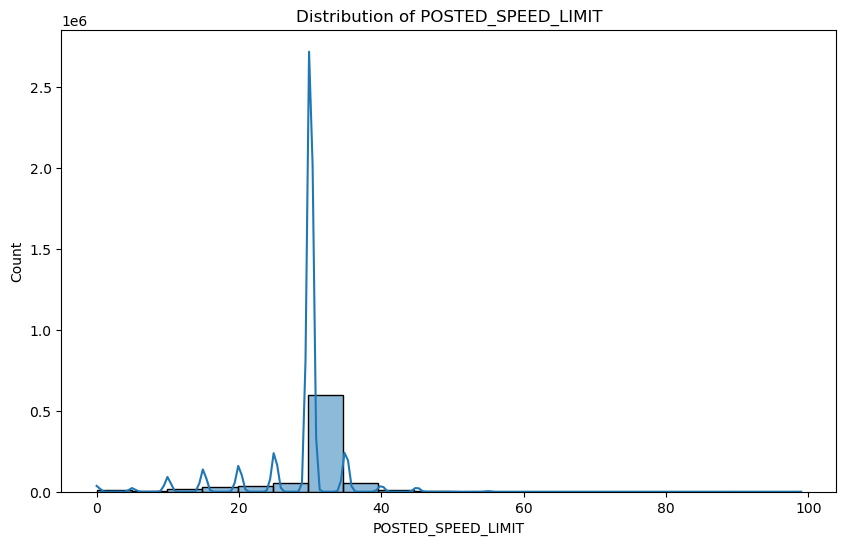

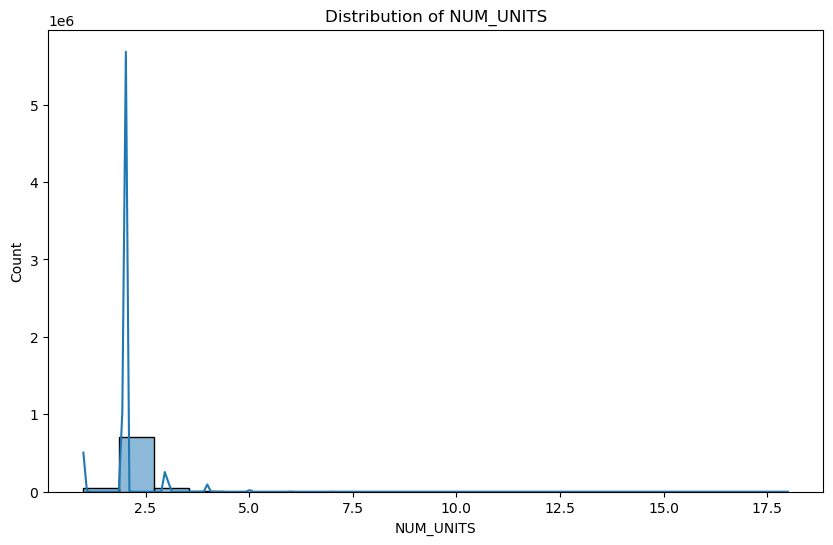

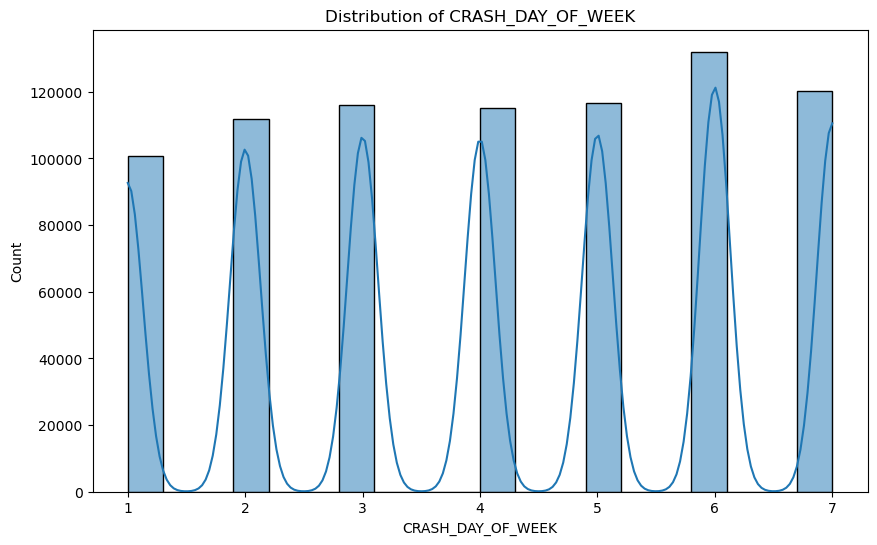

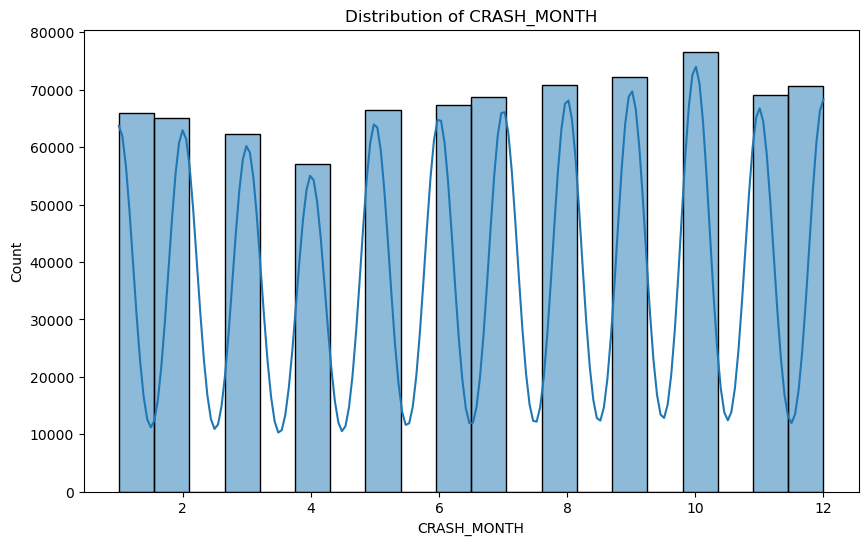

In [19]:
# Created a for loop to create distribution plots for the numerical features
numerical_features = ['POSTED_SPEED_LIMIT', 'NUM_UNITS', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(new_crash_df[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
    plt.show()

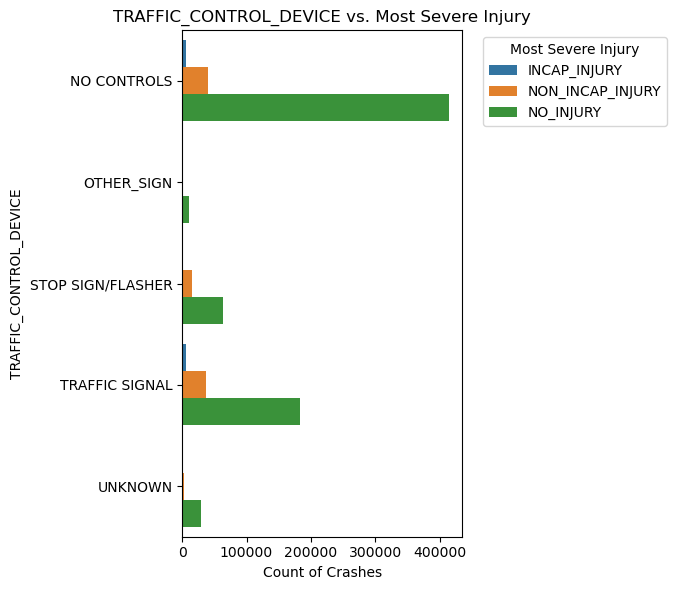

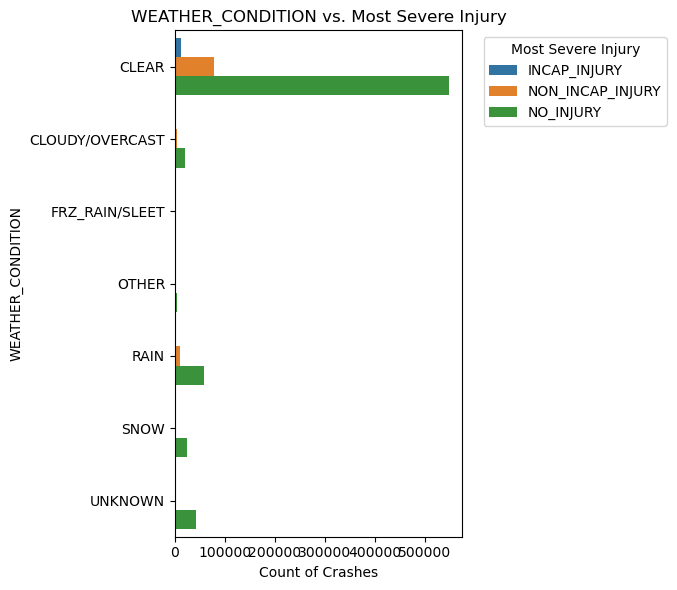

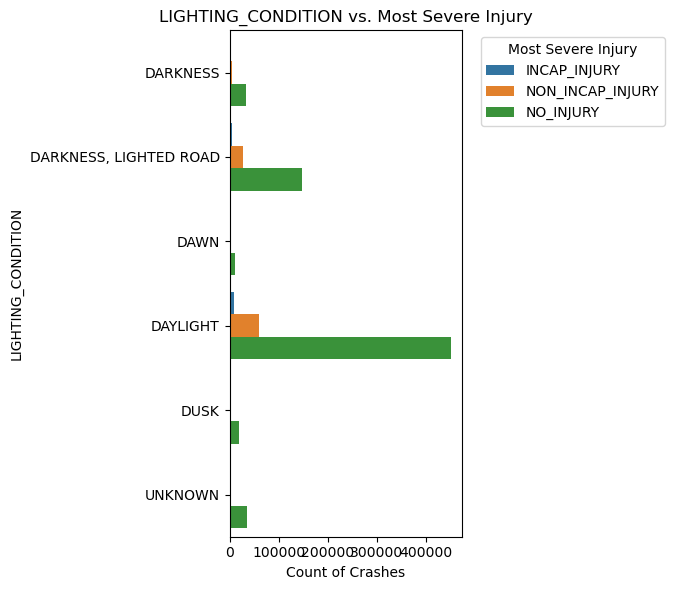

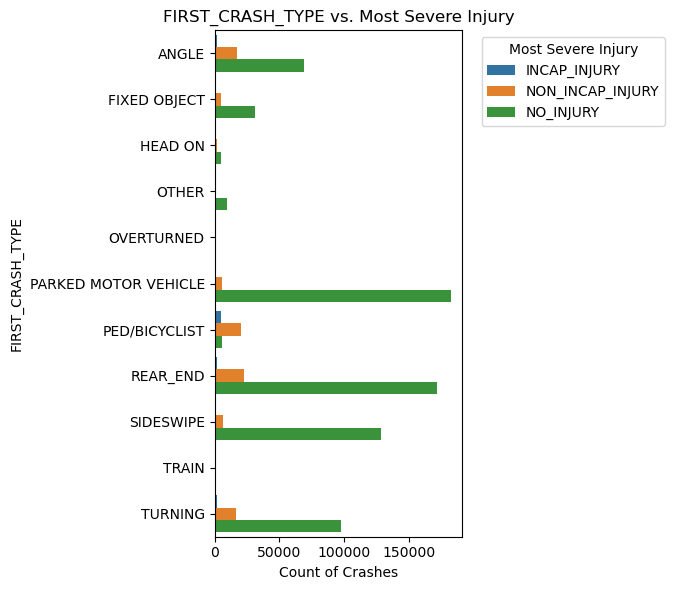

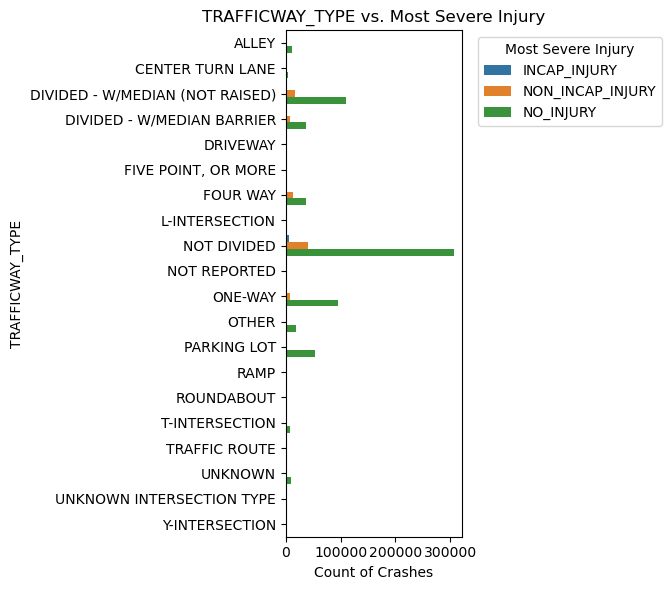

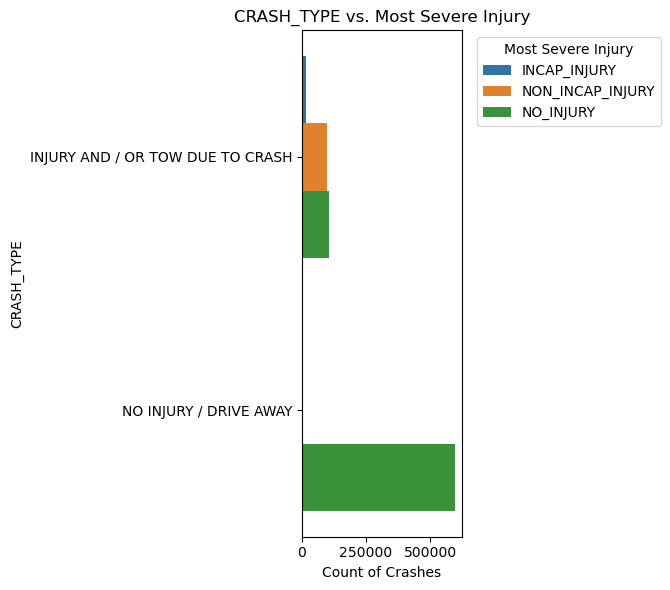

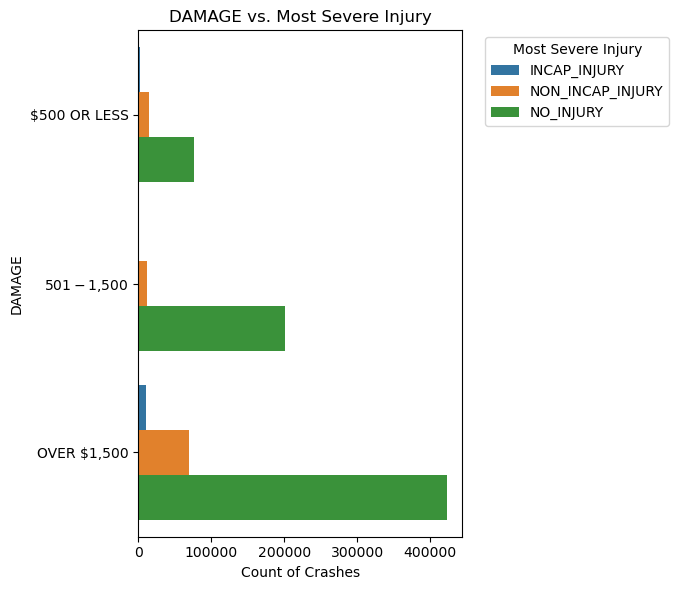

C:\Users\uyamu\AppData\Local\Temp\ipykernel_5260\3251971078.py:19: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


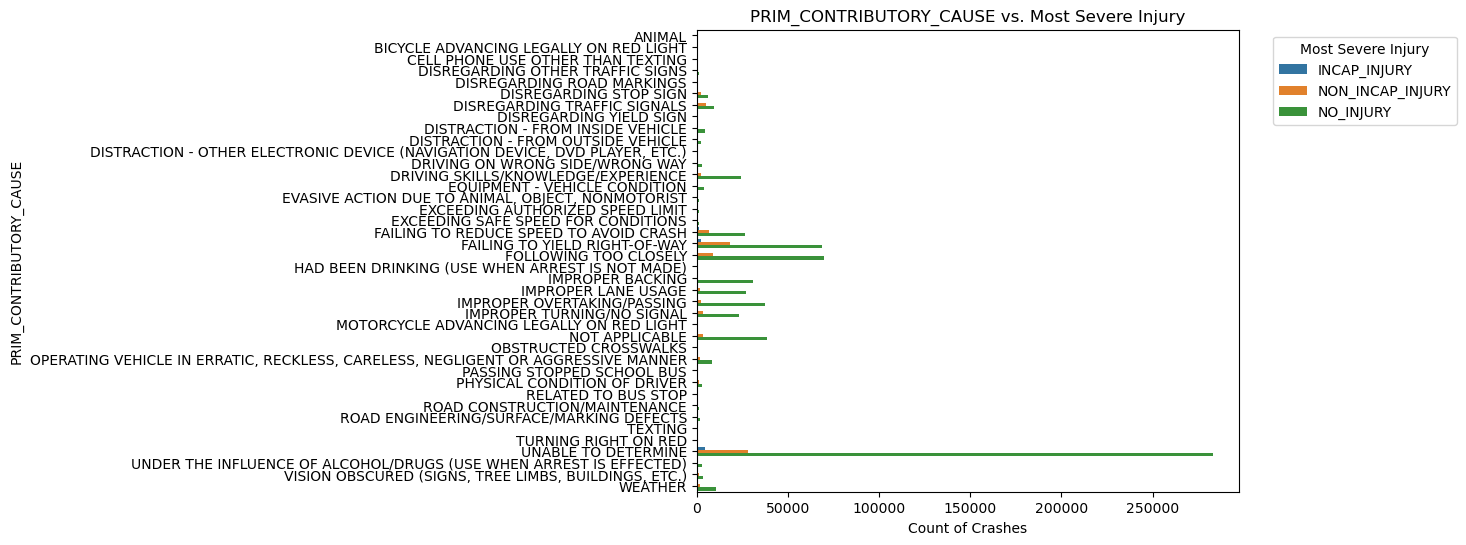

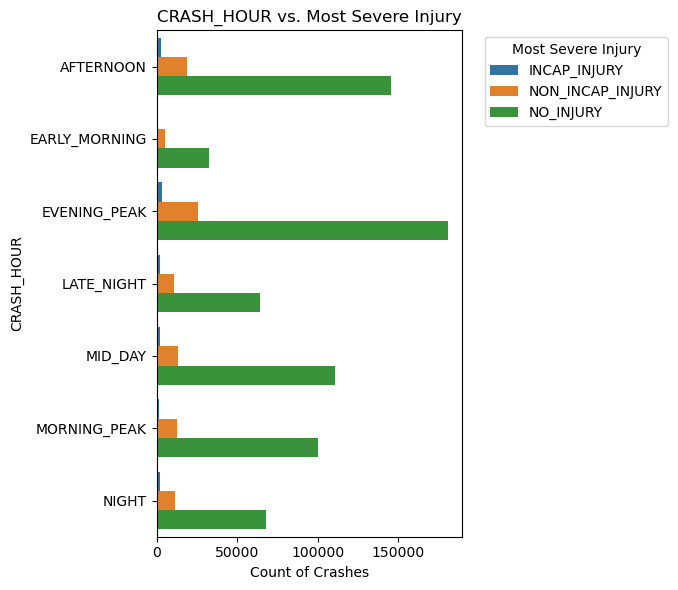

In [90]:
# Created a for loop to create bar plots for each categorical feature vs. Number of crashes vs. Most Severe Injury
categorical_features = [
    'TRAFFIC_CONTROL_DEVICE', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
    'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'CRASH_TYPE', 'DAMAGE',
    'PRIM_CONTRIBUTORY_CAUSE', 'CRASH_HOUR'
]

for feature in categorical_features:
    plt.figure(figsize=(7,6))
    
    agg_df = crash_df.groupby([feature, 'MOST_SEVERE_INJURY']).size().reset_index(name='counts')
    
    sns.barplot(data=agg_df, y=feature, x='counts', hue='MOST_SEVERE_INJURY', ci=None)
    
    plt.title(f'{feature} vs. Most Severe Injury')
    plt.xlabel('Count of Crashes')
    plt.ylabel(feature)
    plt.legend(title='Most Severe Injury', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

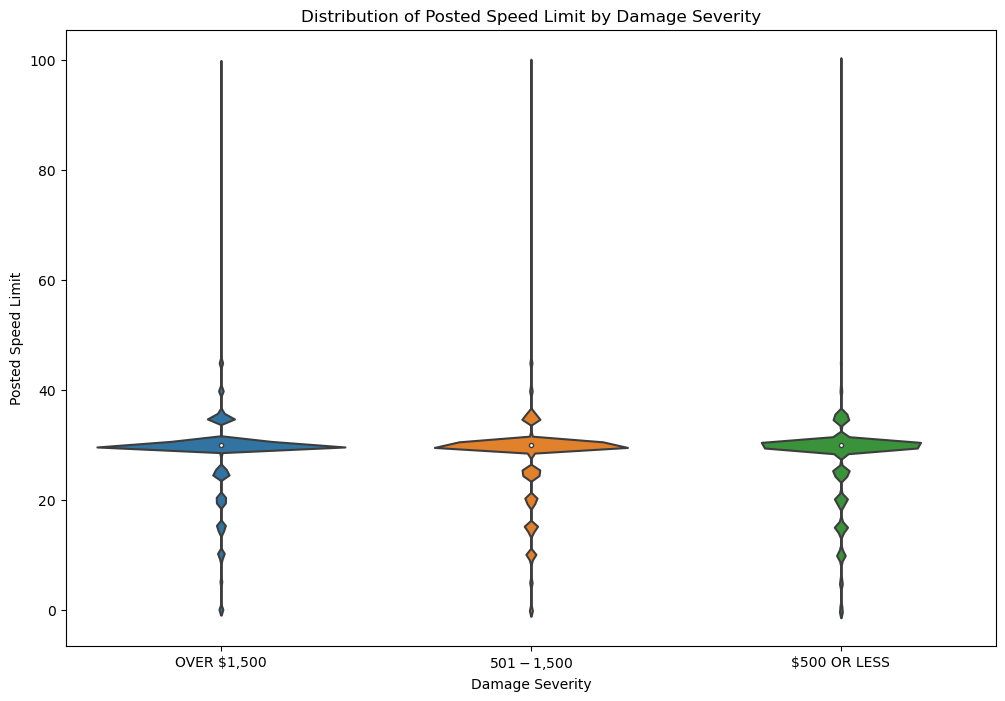

In [21]:
# Created a Violin plot for posted speed limits effect on damage
plt.figure(figsize=(12, 8))
sns.violinplot(x='DAMAGE', y='POSTED_SPEED_LIMIT', data=new_crash_df)
plt.title('Distribution of Posted Speed Limit by Damage Severity')
plt.xlabel('Damage Severity')
plt.ylabel('Posted Speed Limit')
plt.show()

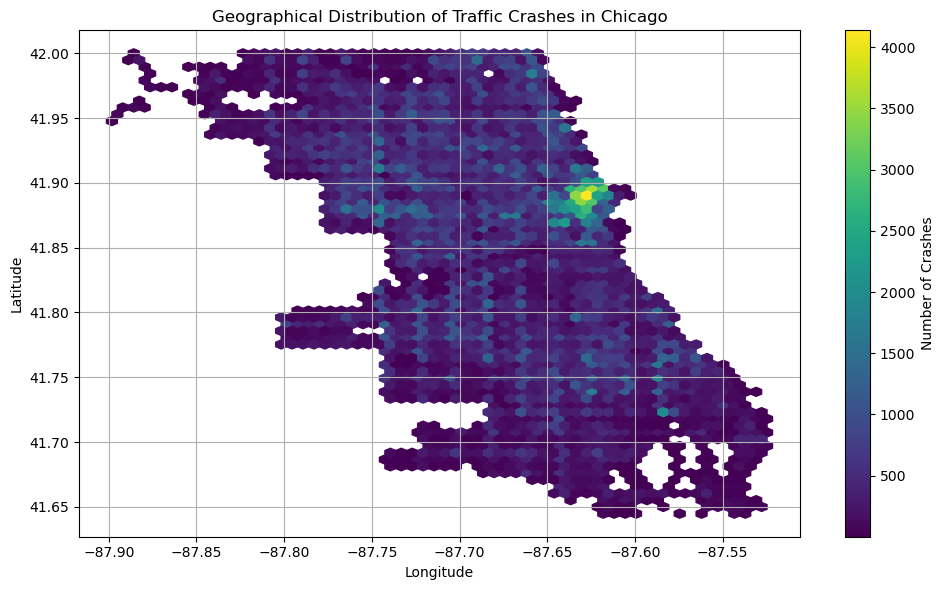

In [22]:
# Created a hexbin plot to display number of crashes vs Latitude and Longitude.

# Filtered the data for outliers or incorrect values to match the Chicago area
chicago_df = new_crash_df[(new_crash_df['LATITUDE'].between(41.6, 42.0)) &
                          (new_crash_df['LONGITUDE'].between(-87.9, -87.5))]

# Created a hexbin plot with the correct filters applied
plt.figure(figsize=(10, 6))
plt.hexbin(x=chicago_df['LONGITUDE'], y=chicago_df['LATITUDE'],
           gridsize=60,
           cmap='viridis', mincnt=1)
plt.colorbar().set_label('Number of Crashes')
plt.title('Geographical Distribution of Traffic Crashes in Chicago')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()

Above Graph shows more incidents happened in the location (Latiude: 41.85 and 41.90) between Longitude: -87.65 and -87.60.

## 4. Train Test Split before Preprocessing:

Starting our train test split with columns which has feature engineering done, to start preprocessing steps.

In [23]:
# SPLIT THE DATA INTO TRAINING AND TESTS SETS
cols_chosen = ['POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'NUM_UNITS',
       'CRASH_HOUR']
       
X = crash_df[cols_chosen]
y = crash_df['MOST_SEVERE_INJURY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
crash_df['MOST_SEVERE_INJURY'].value_counts()

MOST_SEVERE_INJURY
NO_INJURY           700415
NON_INCAP_INJURY     97292
INCAP_INJURY         14676
Name: count, dtype: int64

In [25]:
X_train.head()

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,NUM_UNITS,CRASH_HOUR
288203,30,STOP SIGN/FLASHER,CLEAR,"DARKNESS, LIGHTED ROAD",REAR_END,FOUR WAY,"OVER $1,500",UNABLE TO DETERMINE,2,LATE_NIGHT
628414,30,STOP SIGN/FLASHER,CLEAR,DAWN,ANGLE,NOT DIVIDED,"OVER $1,500",UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN...,4,NIGHT
695170,30,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),"OVER $1,500",IMPROPER TURNING/NO SIGNAL,2,MORNING_PEAK
658756,30,TRAFFIC SIGNAL,SNOW,"DARKNESS, LIGHTED ROAD",TURNING,DIVIDED - W/MEDIAN BARRIER,$500 OR LESS,UNABLE TO DETERMINE,2,NIGHT
205564,30,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,ANGLE,OTHER,"$501 - $1,500",FAILING TO YIELD RIGHT-OF-WAY,2,MID_DAY


In [26]:
X_test.head()

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,NUM_UNITS,CRASH_HOUR
629697,30,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,"OVER $1,500",UNABLE TO DETERMINE,2,MORNING_PEAK
187587,30,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE,NOT DIVIDED,"OVER $1,500",UNABLE TO DETERMINE,2,AFTERNOON
482645,35,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),"OVER $1,500",IMPROPER OVERTAKING/PASSING,2,EVENING_PEAK
665547,35,NO CONTROLS,CLEAR,DARKNESS,REAR_END,DIVIDED - W/MEDIAN (NOT RAISED),"OVER $1,500",NOT APPLICABLE,2,EVENING_PEAK
550129,15,NO CONTROLS,FRZ_RAIN/SLEET,DARKNESS,PARKED MOTOR VEHICLE,PARKING LOT,"$501 - $1,500",WEATHER,2,EVENING_PEAK


In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 649906 entries, 288203 to 122353
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   POSTED_SPEED_LIMIT       649906 non-null  int64 
 1   TRAFFIC_CONTROL_DEVICE   649906 non-null  object
 2   WEATHER_CONDITION        649906 non-null  object
 3   LIGHTING_CONDITION       649906 non-null  object
 4   FIRST_CRASH_TYPE         649906 non-null  object
 5   TRAFFICWAY_TYPE          649906 non-null  object
 6   DAMAGE                   649906 non-null  object
 7   PRIM_CONTRIBUTORY_CAUSE  649906 non-null  object
 8   NUM_UNITS                649906 non-null  int64 
 9   CRASH_HOUR               649906 non-null  object
dtypes: int64(2), object(8)
memory usage: 54.5+ MB


In [28]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162477 entries, 629697 to 118034
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   POSTED_SPEED_LIMIT       162477 non-null  int64 
 1   TRAFFIC_CONTROL_DEVICE   162477 non-null  object
 2   WEATHER_CONDITION        162477 non-null  object
 3   LIGHTING_CONDITION       162477 non-null  object
 4   FIRST_CRASH_TYPE         162477 non-null  object
 5   TRAFFICWAY_TYPE          162477 non-null  object
 6   DAMAGE                   162477 non-null  object
 7   PRIM_CONTRIBUTORY_CAUSE  162477 non-null  object
 8   NUM_UNITS                162477 non-null  int64 
 9   CRASH_HOUR               162477 non-null  object
dtypes: int64(2), object(8)
memory usage: 13.6+ MB


In [29]:
X_train.shape

(649906, 10)

In [30]:
X_test.shape

(162477, 10)

In [31]:
y_train.head()

288203    NO_INJURY
628414    NO_INJURY
695170    NO_INJURY
658756    NO_INJURY
205564    NO_INJURY
Name: MOST_SEVERE_INJURY, dtype: object

In [32]:
y_test.head()

629697           NO_INJURY
187587           NO_INJURY
482645    NON_INCAP_INJURY
665547    NON_INCAP_INJURY
550129           NO_INJURY
Name: MOST_SEVERE_INJURY, dtype: object

In [33]:
y_train.isnull().sum()

0

In [34]:
y_test.isnull().sum()

0

In [35]:
y_train.value_counts()

MOST_SEVERE_INJURY
NO_INJURY           560147
NON_INCAP_INJURY     78081
INCAP_INJURY         11678
Name: count, dtype: int64

In [36]:
y_test.value_counts()

MOST_SEVERE_INJURY
NO_INJURY           140268
NON_INCAP_INJURY     19211
INCAP_INJURY          2998
Name: count, dtype: int64

Clearly, we see our target column `MOST_SEVERE_INJURY` has class imbalance. After running Base Model and checking right metric, we can look for
Oversampling or Undersampling to run the right model.

# 5. Preprocessing using Pipelines:

Columns `TRAFFIC_CONTROL_DEVICE`, `DEVICE_CONDITION`, `WEATHER_CONDITION`, `LIGHTING_CONDITION`, `FIRST_CRASH_TYPE`, `TRAFFICWAY_TYPE`, `DAMAGE`, `PRIM_CONTRIBUTORY_CAUSE`, `SEC_CONTRIBUTORY_CAUSE` and `CRASH_HOUR` are categorical columns, we are using One_Hot_Encoder for categorical columns. Numerical columns are `POSTED_SPEED_LIMIT`, `NUM_UNITS`, `LATITUDE` & `LONGITUDE`.

In [37]:
# Pipelines for numerical and categorical data processing

category_pipe = Pipeline([
    ('ohe', OneHotEncoder(drop='first', sparse=False))
])


# ColumnTransformer definition
ct = ColumnTransformer([
    ('num1', 'passthrough', ['NUM_UNITS', 'POSTED_SPEED_LIMIT']),  # No transformation needed
    ('category', category_pipe, [
        'TRAFFIC_CONTROL_DEVICE', 
        'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 
        'TRAFFICWAY_TYPE', 'DAMAGE', 
        'PRIM_CONTRIBUTORY_CAUSE', 'CRASH_HOUR'])
    ])

In [38]:
ct

ColumnTransformer(transformers=[('num1', 'passthrough',
                                 ['NUM_UNITS', 'POSTED_SPEED_LIMIT']),
                                ('category',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False))]),
                                 ['TRAFFIC_CONTROL_DEVICE', 'WEATHER_CONDITION',
                                  'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
                                  'TRAFFICWAY_TYPE', 'DAMAGE',
                                  'PRIM_CONTRIBUTORY_CAUSE', 'CRASH_HOUR'])])

In [39]:
ct.fit(X_train, y_train)
X_train_proc = ct.transform(X_train)
X_train_proc.shape

(649906, 93)

In [40]:
X_test_proc = ct.transform(X_test)
X_test_proc.shape

(162477, 93)

In [41]:
ohe_col = ct.named_transformers_['category'].named_steps['ohe'].get_feature_names_out()

#ohe_col

In [42]:
column2 = ['POSTED_SPEED_LIMIT']
column1 = ['NUM_UNITS']
columnlist = column1 + column2 + list(ohe_col) 
len(columnlist)

93

In [43]:
X_train_proc_df = pd.DataFrame(X_train_proc, columns = columnlist)
X_train_proc_df

,NUM_UNITS,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE_OTHER_SIGN,TRAFFIC_CONTROL_DEVICE_STOP SIGN/FLASHER,TRAFFIC_CONTROL_DEVICE_TRAFFIC SIGNAL,TRAFFIC_CONTROL_DEVICE_UNKNOWN,WEATHER_CONDITION_CLOUDY/OVERCAST,WEATHER_CONDITION_FRZ_RAIN/SLEET,WEATHER_CONDITION_OTHER,WEATHER_CONDITION_RAIN,...,PRIM_CONTRIBUTORY_CAUSE_UNABLE TO DETERMINE,PRIM_CONTRIBUTORY_CAUSE_UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED),"PRIM_CONTRIBUTORY_CAUSE_VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)",PRIM_CONTRIBUTORY_CAUSE_WEATHER,CRASH_HOUR_EARLY_MORNING,CRASH_HOUR_EVENING_PEAK,CRASH_HOUR_LATE_NIGHT,CRASH_HOUR_MID_DAY,CRASH_HOUR_MORNING_PEAK,CRASH_HOUR_NIGHT
0,2.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,4.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.0,30.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649901,2.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
649902,2.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
649903,2.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
649904,2.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [44]:
X_test_proc_df = pd.DataFrame(X_test_proc, columns=columnlist)
X_test_proc_df

,NUM_UNITS,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE_OTHER_SIGN,TRAFFIC_CONTROL_DEVICE_STOP SIGN/FLASHER,TRAFFIC_CONTROL_DEVICE_TRAFFIC SIGNAL,TRAFFIC_CONTROL_DEVICE_UNKNOWN,WEATHER_CONDITION_CLOUDY/OVERCAST,WEATHER_CONDITION_FRZ_RAIN/SLEET,WEATHER_CONDITION_OTHER,WEATHER_CONDITION_RAIN,...,PRIM_CONTRIBUTORY_CAUSE_UNABLE TO DETERMINE,PRIM_CONTRIBUTORY_CAUSE_UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED),"PRIM_CONTRIBUTORY_CAUSE_VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)",PRIM_CONTRIBUTORY_CAUSE_WEATHER,CRASH_HOUR_EARLY_MORNING,CRASH_HOUR_EVENING_PEAK,CRASH_HOUR_LATE_NIGHT,CRASH_HOUR_MID_DAY,CRASH_HOUR_MORNING_PEAK,CRASH_HOUR_NIGHT
0,2.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2.0,15.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162472,2.0,30.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
162473,3.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
162474,2.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
162475,2.0,30.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6. Baseline Model Random Forest Classifier:

Running our first Baseline model Random Forest Classifier with Target as multivariable classfication, choosing parameters n_estimators = 50. 

In [45]:
model1 = RandomForestClassifier(n_estimators = 50, random_state= 42)

In [46]:
model1.fit(X_train_proc_df, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [47]:
y_pred = model1.predict(X_test_proc_df)
y_pred

array(['NO_INJURY', 'NO_INJURY', 'NON_INCAP_INJURY', ...,
       'NON_INCAP_INJURY', 'NO_INJURY', 'NO_INJURY'], dtype=object)

In [48]:
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

    INCAP_INJURY       0.18      0.04      0.06      2998
NON_INCAP_INJURY       0.49      0.25      0.33     19211
       NO_INJURY       0.89      0.97      0.93    140268

        accuracy                           0.87    162477
       macro avg       0.52      0.42      0.44    162477
    weighted avg       0.83      0.87      0.84    162477



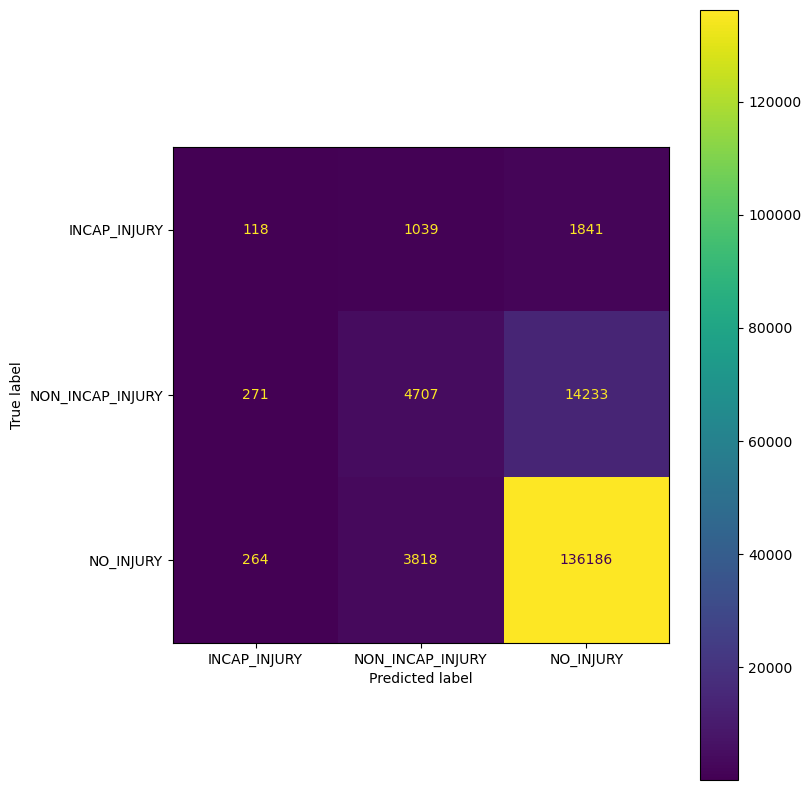

In [49]:
ConfusionMatrixDisplay.from_estimator(model1, X_test_proc_df,y_test);

Baselin model's accuracy score was 87%, and was depending on the Target class "No_Injury". Since our Target variable has class imbalance, trying 
the next model with SMOTE oversampling method.

In [50]:
#type(model1)
feat_imp = model1.feature_importances_

#feat_imp
feat_imp_series = pd.Series(feat_imp, index = X_train_proc_df.columns).sort_values(ascending = False)

In [51]:
top_20_feat_imp = feat_imp_series.head(20)
top_20_feat_imp

FIRST_CRASH_TYPE_PED/BICYCLIST                     0.188122
POSTED_SPEED_LIMIT                                 0.094374
NUM_UNITS                                          0.047763
FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE              0.030715
WEATHER_CONDITION_RAIN                             0.029664
CRASH_HOUR_EVENING_PEAK                            0.027135
TRAFFIC_CONTROL_DEVICE_TRAFFIC SIGNAL              0.025712
FIRST_CRASH_TYPE_SIDESWIPE                         0.021174
CRASH_HOUR_MID_DAY                                 0.020524
CRASH_HOUR_MORNING_PEAK                            0.020519
DAMAGE_$501 - $1,500                               0.020355
DAMAGE_OVER $1,500                                 0.020179
TRAFFIC_CONTROL_DEVICE_STOP SIGN/FLASHER           0.017300
TRAFFICWAY_TYPE_NOT DIVIDED                        0.016773
FIRST_CRASH_TYPE_TURNING                           0.016568
FIRST_CRASH_TYPE_REAR_END                          0.016024
LIGHTING_CONDITION_DARKNESS, LIGHTED ROA

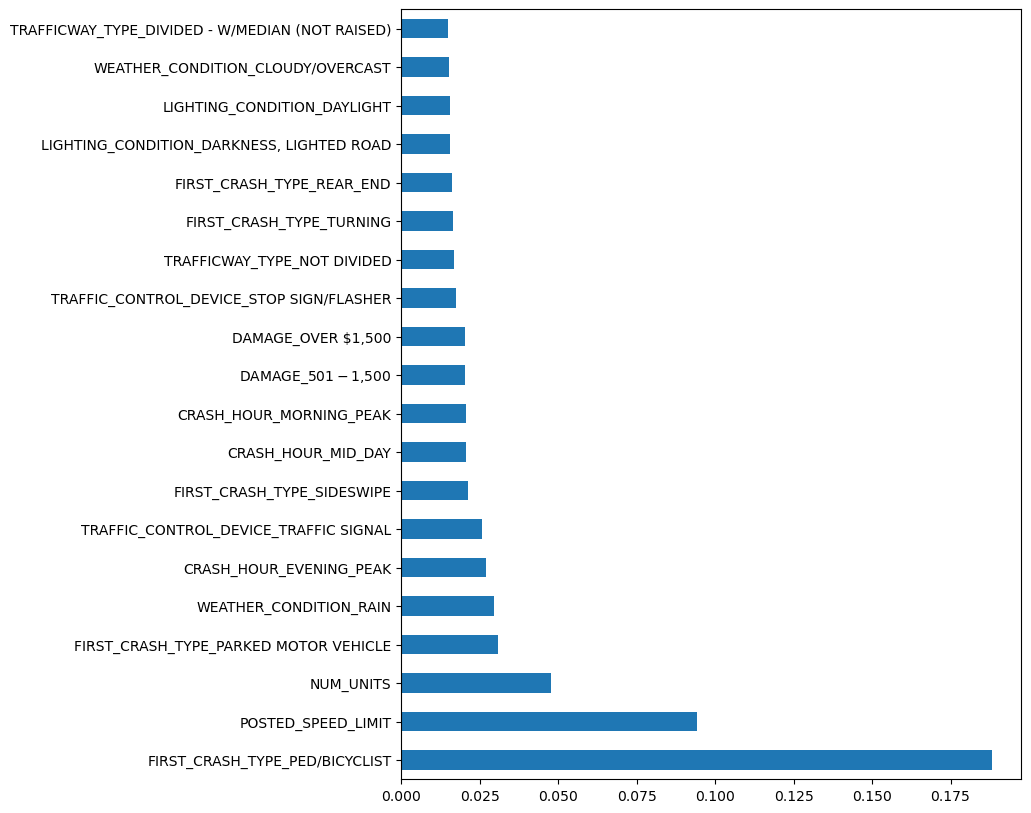

In [52]:
top_20_feat_imp.plot(kind = 'barh');

Baseline Model shows accuracy 87, and mostly comes from the majority class "No_Injury" (86% of the dataset). Above graph shows 
"First_Crash_type" incidents with Pedestrian/Bicyclist, Vehicle when parked, Sideswipe, while Turning and Rear-Ended. Incidents with 'No_injury' happening in Traffic signal intersections, near Stop sign/Flashers, Traffic way Not divided and Traffic way with Median(No Barriers). Other factors are
incidents happening during Rain or Cloudy weather conditions, and most of the time during Evening Peak hours, Midday or Morning peak hours. 


## 7. Model 2, SMOTE Oversampling for imbalanced Target:

Since Target category 'No_Injury' is around 86% of the dataset and has class imbalance, we want to turn our attention to find major causes of Incapcitated and Non-incapcitated injuries. Selecting categories "Non_Incap_Injury"and "Incap_Injury" from the dataset to run next model, and analyze the factors causing the incidents. Here, we are using SMOTE Oversampling techniques both sampling_strategy 0.7 and "not majority" options.

In [53]:
new_crash_df

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,NUM_UNITS,MOST_SEVERE_INJURY,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
0,30,TRAFFIC SIGNAL,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,2,INCAP_INJURY,EVENING_PEAK,3,9,NaN,NaN
1,50,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR_END,DIVIDED - W/MEDIAN BARRIER,NO INJURY / DRIVE AWAY,"OVER $1,500",FOLLOWING TOO CLOSELY,FOLLOWING TOO CLOSELY,2,NO_INJURY,EVENING_PEAK,6,9,NaN,NaN
2,30,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NO INJURY / DRIVE AWAY,"OVER $1,500",FAILING TO REDUCE SPEED TO AVOID CRASH,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",4,NO_INJURY,AFTERNOON,7,7,41.854120,-87.665902
3,30,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE,NOT DIVIDED,NO INJURY / DRIVE AWAY,"OVER $1,500",FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,2,NO_INJURY,LATE_NIGHT,4,8,NaN,NaN
4,15,OTHER_SIGN,CLEAR,DAYLIGHT,REAR_END,OTHER,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",FOLLOWING TOO CLOSELY,DISTRACTION - FROM INSIDE VEHICLE,2,NON_INCAP_INJURY,MID_DAY,6,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814165,30,STOP SIGN/FLASHER,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,ONE-WAY,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",DISREGARDING STOP SIGN,UNABLE TO DETERMINE,2,NON_INCAP_INJURY,EVENING_PEAK,4,3,41.865758,-87.693371
814166,30,NO CONTROLS,CLOUDY/OVERCAST,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NO INJURY / DRIVE AWAY,$500 OR LESS,NOT APPLICABLE,NOT APPLICABLE,3,NO_INJURY,MORNING_PEAK,3,3,41.868937,-87.671258
814167,30,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,2,NO_INJURY,LATE_NIGHT,4,3,41.908352,-87.690199
814168,30,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,2,NO_INJURY,EVENING_PEAK,2,3,41.953760,-87.727480


In [54]:
# Creating dataset with 'NON_INCAP_INJURY' and 'INCAP_INJURY' to find models for these classes
new_crash_df = crash_df.loc[(crash_df['MOST_SEVERE_INJURY'] == 'NON_INCAP_INJURY') | (crash_df['MOST_SEVERE_INJURY'] == 'INCAP_INJURY')]
new_crash_df

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,NUM_UNITS,MOST_SEVERE_INJURY,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
0,30,TRAFFIC SIGNAL,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,2,INCAP_INJURY,EVENING_PEAK,3,9,NaN,NaN
4,15,OTHER_SIGN,CLEAR,DAYLIGHT,REAR_END,OTHER,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",FOLLOWING TOO CLOSELY,DISTRACTION - FROM INSIDE VEHICLE,2,NON_INCAP_INJURY,MID_DAY,6,8,NaN,NaN
5,25,NO CONTROLS,CLEAR,DAYLIGHT,PED/BICYCLIST,ONE-WAY,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,2,INCAP_INJURY,MORNING_PEAK,3,11,NaN,NaN
13,25,NO CONTROLS,RAIN,DAYLIGHT,REAR_END,RAMP,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",FOLLOWING TOO CLOSELY,NOT APPLICABLE,2,NON_INCAP_INJURY,EVENING_PEAK,5,9,NaN,NaN
16,30,NO CONTROLS,RAIN,DUSK,PED/BICYCLIST,FOUR WAY,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",FAILING TO REDUCE SPEED TO AVOID CRASH,NOT APPLICABLE,2,NON_INCAP_INJURY,EVENING_PEAK,6,9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814104,30,UNKNOWN,UNKNOWN,DARKNESS,FIXED OBJECT,UNKNOWN INTERSECTION TYPE,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,2,NON_INCAP_INJURY,NIGHT,2,3,41.802920,-87.677084
814144,30,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR_END,T-INTERSECTION,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,2,NON_INCAP_INJURY,AFTERNOON,1,3,41.990512,-87.706203
814145,30,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR_END,NOT DIVIDED,INJURY AND / OR TOW DUE TO CRASH,"$501 - $1,500",CELL PHONE USE OTHER THAN TEXTING,NOT APPLICABLE,3,NON_INCAP_INJURY,MID_DAY,4,3,41.761848,-87.741671
814157,25,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE,NOT DIVIDED,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER OVERTAKING/PASSING,FOLLOWING TOO CLOSELY,2,NON_INCAP_INJURY,AFTERNOON,4,3,41.663226,-87.617498


In [55]:
# Started the 2nd Train/Test Split
cols_chosen = ['POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'NUM_UNITS',
       'CRASH_HOUR']
       
X = new_crash_df[cols_chosen]
y = new_crash_df['MOST_SEVERE_INJURY']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y, test_size = 0.2, random_state=42)

In [56]:
X_test2.shape, X_train2.shape

((22394, 10), (89574, 10))

In [57]:
X_test2.columns

Index(['POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'NUM_UNITS', 'CRASH_HOUR'],
      dtype='object')

In [58]:
# Initialized the LabelEncoder
le = LabelEncoder()

# Fitted and transformed the training labels to encode
y_train2_encoded = le.fit_transform(y_train2)

# Transformed the test labels to encode
y_test2_encoded = le.transform(y_test2)

In [59]:
ct

ColumnTransformer(transformers=[('num1', 'passthrough',
                                 ['NUM_UNITS', 'POSTED_SPEED_LIMIT']),
                                ('category',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False))]),
                                 ['TRAFFIC_CONTROL_DEVICE', 'WEATHER_CONDITION',
                                  'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
                                  'TRAFFICWAY_TYPE', 'DAMAGE',
                                  'PRIM_CONTRIBUTORY_CAUSE', 'CRASH_HOUR'])])

In [60]:
# Created an imblearn pipeline with the ColumnTransformer and SMOTE
pipeline = imbPipeline([
    ('preprocessor', ct),  # Your existing ColumnTransformer
    ('oversampler', SMOTE(sampling_strategy=0.7)),  # Added SMOTE into the pipeline
    ('classifier', RandomForestClassifier(n_estimators=50, max_depth = 3, max_features = 'sqrt', random_state=42))  # Added a classifier to the pipeline
])

# Fitted the pipeline on the training data
pipeline.fit(X_train2, y_train2)

# Predicted on the test data using the pipeline
y_pred2 = pipeline.predict(X_test2)


In [61]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num1', 'passthrough',
                                                  ['NUM_UNITS',
                                                   'POSTED_SPEED_LIMIT']),
                                                 ('category',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['TRAFFIC_CONTROL_DEVICE',
                                                   'WEATHER_CONDITION',
                                                   'LIGHTING_CONDITION',
                                                   'FIRST_CRASH_TYPE',
                                                   'TRAFFICWAY_TYPE', 'DAMAGE',
                                                   'PRIM_CONTRIBUTORY_CAUSE',
                                                   'CRASH_HOUR'])])),
                ('oversampler', SMOTE(sampling_strategy=0.7)),
                ('classifier',
                 RandomForestClassifier(max_depth=3, n_estimators=50,
                                        random_state=42))])

In [62]:
ohe_col2 = pipeline.named_steps['preprocessor'].named_transformers_['category'].named_steps['ohe'].get_feature_names_out()

#ohe_col2

In [63]:
columnA = ['NUM_UNITS']
columnB = ['POSTED_SPEED_LIMIT']
columnlist2 = columnA + columnB + list(ohe_col2)
len(columnlist2)

93

In [64]:
# Calculated accuracy and generated a classification report
accuracy = accuracy_score(y_test2, y_pred2)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test2, y_pred2)
print("Classification Report:")
print(report)

Accuracy: 0.8669286416004287
Classification Report:
                  precision    recall  f1-score   support

    INCAP_INJURY       0.24      0.00      0.00      2965
NON_INCAP_INJURY       0.87      1.00      0.93     19429

        accuracy                           0.87     22394
       macro avg       0.55      0.50      0.47     22394
    weighted avg       0.78      0.87      0.81     22394



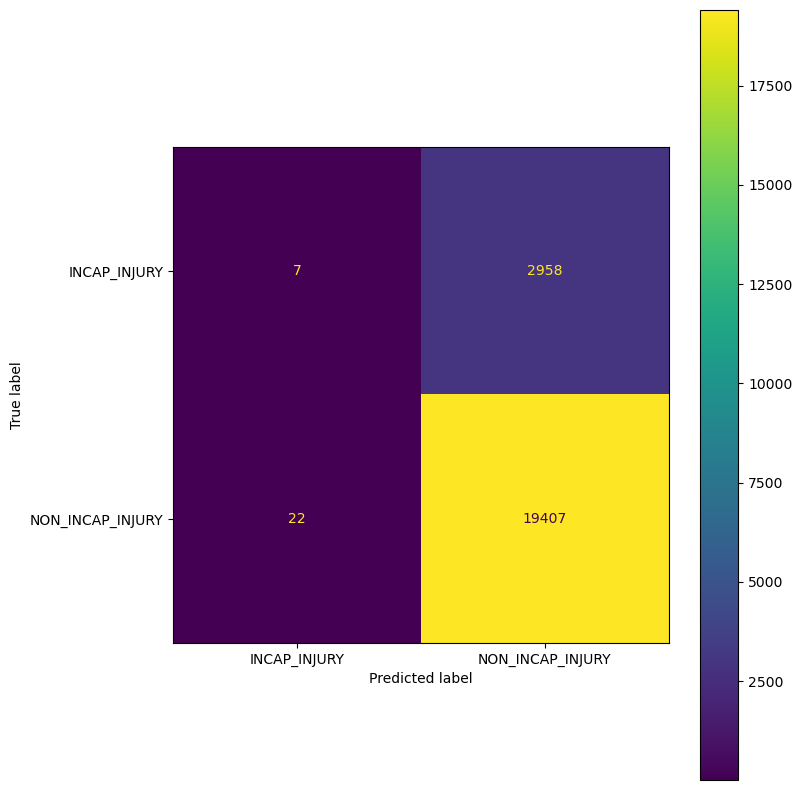

In [65]:
ConfusionMatrixDisplay.from_estimator(pipeline, X_test2, y_test2);

In [66]:
# Calculated probabilities for the positive class
probs = pipeline.predict_proba(X_test2)[:, 1]

# Calculated accuracy
roc_auc = roc_auc_score(y_test2_encoded, probs)
print(f"ROC AUC: {roc_auc}")

ROC AUC: 0.6231436778022664


In [67]:
scores2 = cross_val_score(pipeline, X_train2, y_train2, cv=5, scoring='accuracy')

print("Cross-validation scores:", scores2)
print("Mean accuracy:", scores2.mean())

Cross-validation scores: [0.86547586 0.86843427 0.86854591 0.86849009 0.86904097]
Mean accuracy: 0.8679974216128779


## 7. Random Forest Model using GridSearchCV and OverSampling Techniques:

In [68]:
param_grid = {
    'oversampler__sampling_strategy': [0.5, 0.7, 1.0],  # Values to try for sampling_strategy in SMOTE
    'classifier__n_estimators': [10, 50, 100],  # Values to try for n_estimators in RandomForestClassifier
    'classifier__max_depth': [3, 5, None]  # Values to try for max_depth in RandomForestClassifier
}
pipeline = imbPipeline([
    ('preprocessor', ct),  # Your existing ColumnTransformer
    ('oversampler', SMOTE(sampling_strategy=0.7)),  # Added SMOTE into the pipeline
    ('classifier', RandomForestClassifier(n_estimators=50, max_depth = 3, max_features = 'sqrt', random_state=42))  # Added a classifier to the pipeline
])

In [69]:
# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train2, y_train2)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num1',
                                                                         'passthrough',
                                                                         ['NUM_UNITS',
                                                                          'POSTED_SPEED_LIMIT']),
                                                                        ('category',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse=False))]),
                                                                         ['TRAFFIC_CONTROL_DEVICE',
                                                                          'WEATHER_CONDITION',
                                                                          'LIGHTING_CONDITION',
                                                                          'FIRST_CRASH_TYPE',
                                                                          'TRAFFICWAY_TYPE',
                                                                          'DAMAGE',
                                                                          'PRIM_CONTRIBUTORY_CAUSE',
                                                                          'CRASH_HOUR'])])),
                                       ('oversampler',
                                        SMOTE(sampling_strategy=0.7)),
                                       ('classifier',
                                        RandomForestClassifier(max_depth=3,
                                                               n_estimators=50,
                                                               random_state=42))]),
             param_grid={'classifier__max_depth': [3, 5, None],
                         'classifier__n_estimators': [10, 50, 100],
                         'oversampler__sampling_strategy': [0.5, 0.7, 1.0]},
             scoring='accuracy')

In [70]:
print("Best parameters:", grid_search.best_params_)

print("Best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

Best parameters: {'classifier__max_depth': 3, 'classifier__n_estimators': 10, 'oversampler__sampling_strategy': 0.5}
Best score: 0.8692589368044945


In [71]:
best_model.fit(X_train2, y_train2)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num1', 'passthrough',
                                                  ['NUM_UNITS',
                                                   'POSTED_SPEED_LIMIT']),
                                                 ('category',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['TRAFFIC_CONTROL_DEVICE',
                                                   'WEATHER_CONDITION',
                                                   'LIGHTING_CONDITION',
                                                   'FIRST_CRASH_TYPE',
                                                   'TRAFFICWAY_TYPE', 'DAMAGE',
                                                   'PRIM_CONTRIBUTORY_CAUSE',
                                                   'CRASH_HOUR'])])),
                ('oversampler', SMOTE(sampling_strategy=0.5)),
                ('classifier',
                 RandomForestClassifier(max_depth=3, n_estimators=10,
                                        random_state=42))])

Accuracy score for both regular Random forest model with Oversampling (sampling_strategy = 0.7) and GridSearch option with different 
parameters are same. 



In [72]:
best_model = grid_search.best_estimator_.named_steps['classifier']
best_model.feature_importances_
feat_imp2 = best_model.feature_importances_

feat_imp_series2 = pd.Series(feat_imp2, index = columnlist2).sort_values(ascending = False)
top20_rf_model = feat_imp_series2.head(20)
top20_rf_model

FIRST_CRASH_TYPE_REAR_END                                0.294444
FIRST_CRASH_TYPE_PED/BICYCLIST                           0.160268
FIRST_CRASH_TYPE_TURNING                                 0.108701
NUM_UNITS                                                0.099994
DAMAGE_$501 - $1,500                                     0.073980
CRASH_HOUR_LATE_NIGHT                                    0.042311
FIRST_CRASH_TYPE_FIXED OBJECT                            0.038543
TRAFFIC_CONTROL_DEVICE_STOP SIGN/FLASHER                 0.034493
WEATHER_CONDITION_RAIN                                   0.033268
FIRST_CRASH_TYPE_SIDESWIPE                               0.032509
WEATHER_CONDITION_CLOUDY/OVERCAST                        0.016591
DAMAGE_OVER $1,500                                       0.012356
WEATHER_CONDITION_SNOW                                   0.011998
PRIM_CONTRIBUTORY_CAUSE_WEATHER                          0.007689
CRASH_HOUR_EVENING_PEAK                                  0.006565
PRIM_CONTR

<Axes: >

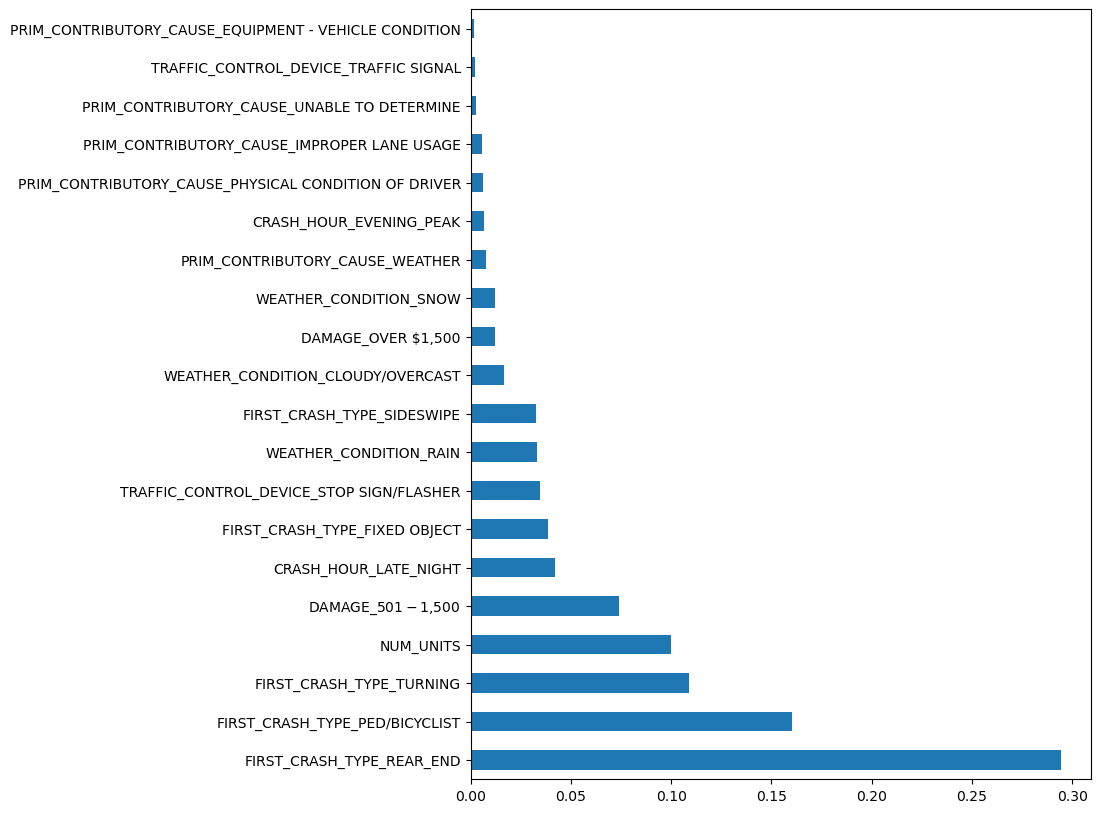

In [73]:
top20_rf_model.plot(kind='barh')

Accuracy Score was 87 for Random Forest SMOTE Oversampling & GridSearchCV with additional tuned hyperparameters options. Best Model with
parameters max_depth: 3, n_estimators: 10, sampling_strategy: 0.5.  Clearly above graph shows the primary cause of crashes are Tailgating, Reckless
Driving, Drunken Drivers, Wrong side/Way driving and Weather related. These incidents are recorded under "First_Crash_Type" as Rear_End, Pedestrian/Bicyclist, Vehicle Hit while parked, hitting Fixed Object, Turning and Headon Collision. Weather is also considered as factor, mostly occurred during Snow, Cloudy and Rain. And the lighting condition as Darkness with lighted roads, reason mostly is "Less Visibility considered as more risk". Vehicle damages are over 1,500 and in some scenarios with small vehicle damages 500-1500.

## 8. XGBoost using GridSearch:

In [98]:
from xgboost import XGBClassifier
pipeline = imbPipeline([
    ('preprocessor', ct),  # Your existing ColumnTransformer
     ('oversampler', SMOTE(sampling_strategy=0.5)),  # Added SMOTE into the pipeline
    ('classifier', XGBClassifier(n_estimators=50, max_depth = 3, objective = 'binary:logistic', random_state=42, learning_rate=0.3))  # Added a classifier to the pipeline
])

In [99]:
#XGBClassifier(n_estimators=50, max_depth = 3, loss = 'binary:logistic', random_state=42, learning_rate=0.1))
param_grid = {
        'classifier__n_estimators': [10, 20, 50, 100],  # Values to try for n_estimators in RandomForestClassifier
    'classifier__max_depth': [3, 5, 6, None]  # Values to try for max_depth in RandomForestClassifier
}

In [100]:
# Create the GridSearchCV object
grid_search2 = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search2.fit(X_train2, y_train2_encoded)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num1',
                                                                         'passthrough',
                                                                         ['NUM_UNITS',
                                                                          'POSTED_SPEED_LIMIT']),
                                                                        ('category',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse=False))]),
                                                                         ['TRAFFIC_CONTROL_DEVICE',
                                                                          'WEATHER_CONDITION',
                                                                          'LIGHTING_CONDITION',
                                                                          'FIRST_CRASH_TYPE',
                                                                          'TRAFFICWAY_TYPE',
                                                                          'DAMAGE',
                                                                          'PRIM_CO...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=3,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=50,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             param_grid={'classifier__max_depth': [3, 5, 6, None],
                         'classifier__n_estimators': [10, 20, 50, 100]},
             scoring='accuracy')

In [101]:
print("Best parameters:", grid_search2.best_params_)

print("Best score:", grid_search2.best_score_)

Best parameters: {'classifier__max_depth': 3, 'classifier__n_estimators': 50}
Best score: 0.8684662993230503


In [107]:
best_model2 = grid_search2.best_estimator_.named_steps['classifier']
best_model2.feature_importances_
feat_imp3 = best_model2.feature_importances_

feat_imp_series3 = pd.Series(feat_imp3, index = columnlist2).sort_values(ascending = False)
top20_xg_model = feat_imp_series3.head(20)
top20_xg_model

WEATHER_CONDITION_RAIN                                  0.084455
DAMAGE_OVER $1,500                                      0.051556
TRAFFICWAY_TYPE_NOT DIVIDED                             0.048901
WEATHER_CONDITION_CLOUDY/OVERCAST                       0.039020
FIRST_CRASH_TYPE_TURNING                                0.035407
FIRST_CRASH_TYPE_REAR_END                               0.035379
TRAFFIC_CONTROL_DEVICE_STOP SIGN/FLASHER                0.035376
TRAFFIC_CONTROL_DEVICE_TRAFFIC SIGNAL                   0.032906
WEATHER_CONDITION_SNOW                                  0.030633
NUM_UNITS                                               0.029690
CRASH_HOUR_MORNING_PEAK                                 0.029300
CRASH_HOUR_EVENING_PEAK                                 0.029219
PRIM_CONTRIBUTORY_CAUSE_UNABLE TO DETERMINE             0.026956
LIGHTING_CONDITION_DUSK                                 0.026714
DAMAGE_$501 - $1,500                                    0.026491
FIRST_CRASH_TYPE_PED/BICY

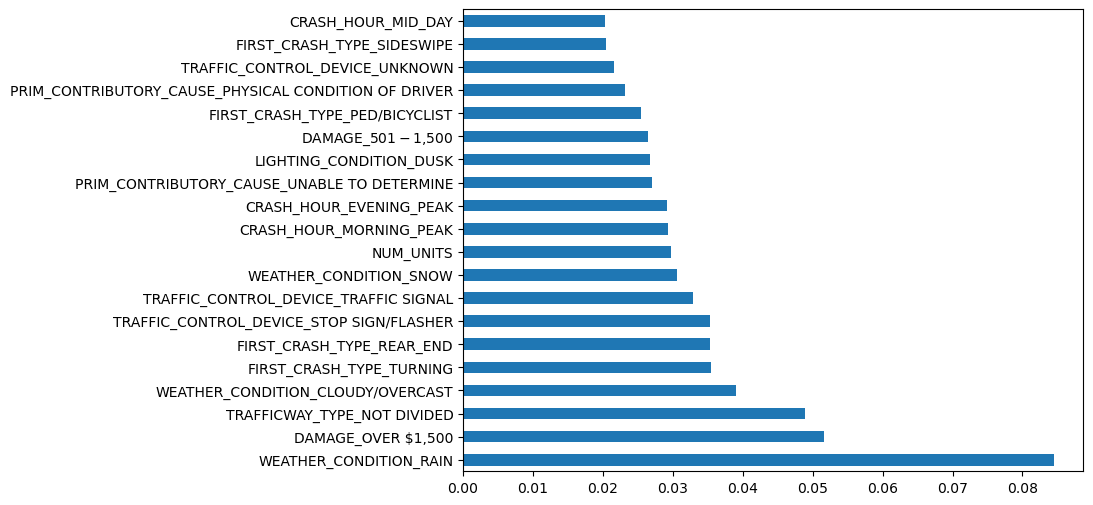

In [108]:
plt.figure(figsize=(8, 6))
top20_xg_model.plot(kind="barh");

XGBoost 

## 8. Final Model using TensorFlow & Keras:


In [74]:
columns_chosen2 = [ 'TRAFFIC_CONTROL_DEVICE', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
       'CRASH_HOUR']

X = new_crash_df[columns_chosen2]
y = new_crash_df['MOST_SEVERE_INJURY']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, random_state=42)

In [75]:
category_pipe = Pipeline([
    ('ohe', OneHotEncoder(drop='first', sparse=False))
])


# ColumnTransformer definition
ct1 = ColumnTransformer([
        ('category', category_pipe, [
        'TRAFFIC_CONTROL_DEVICE', 
        'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 
        'TRAFFICWAY_TYPE', 'DAMAGE', 
        'PRIM_CONTRIBUTORY_CAUSE', 'CRASH_HOUR'])
    ])

In [76]:
X_train3_proc = ct1.fit_transform(X_train3)
X_test3_proc = ct1.transform(X_test3)

X_train3_proc.shape, X_test3_proc.shape

((83976, 91), (27992, 91))

In [77]:
ohe_col1 = ct1.named_transformers_['category'].named_steps['ohe'].get_feature_names_out()


In [78]:
X_train3_proc_df = pd.DataFrame(X_train3_proc, columns = ohe_col1)
X_test3_proc_df = pd.DataFrame(X_test3_proc, columns = ohe_col1)


In [79]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder on the training set target variable
label_encoder.fit(y_train3)

# Transform the target variable of both training and testing sets
y_train3_proc = label_encoder.transform(y_train3)
y_test3_proc = label_encoder.transform(y_test3)
y_train3_proc.shape

(83976,)

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Flatten


# Number of features
n_features = (X_train3_proc.shape[1],)

tensor_crash_model = Sequential()
tensor_crash_model.add(Dense(32, activation='relu', input_shape = (n_features)))
tensor_crash_model.add(Dense(8, activation='relu'))
tensor_crash_model.add(Dense(10, activation = 'sigmoid'))

In [81]:
tensor_crash_model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

In [82]:
from tensorflow.keras.callbacks import EarlyStopping
trainCallback = EarlyStopping(monitor='loss', min_delta = 1e-6, patience = 5)

history_crash = tensor_crash_model.fit(X_train3_proc, y_train3_proc, epochs=30, batch_size= 32, validation_split = 0.2, callbacks=[trainCallback])

Epoch 1/30
2100/2100 [==============================] - 5s 2ms/step - loss: 0.4496 - accuracy: 0.8616 - val_loss: 0.3700 - val_accuracy: 0.8718
Epoch 2/30
2100/2100 [==============================] - 4s 2ms/step - loss: 0.3783 - accuracy: 0.8682 - val_loss: 0.3659 - val_accuracy: 0.8718
Epoch 3/30
2100/2100 [==============================] - 5s 2ms/step - loss: 0.3764 - accuracy: 0.8683 - val_loss: 0.3729 - val_accuracy: 0.8718
Epoch 4/30
2100/2100 [==============================] - 5s 2ms/step - loss: 0.3754 - accuracy: 0.8683 - val_loss: 0.3656 - val_accuracy: 0.8718
Epoch 5/30
2100/2100 [==============================] - 6s 3ms/step - loss: 0.3739 - accuracy: 0.8683 - val_loss: 0.3663 - val_accuracy: 0.8718
Epoch 6/30
2100/2100 [==============================] - 7s 3ms/step - loss: 0.3731 - accuracy: 0.8682 - val_loss: 0.3655 - val_accuracy: 0.8716
Epoch 7/30
2100/2100 [==============================] - 5s 3ms/step - loss: 0.3719 - accuracy: 0.8683 - val_loss: 0.3662 - val_accuracy:

In [83]:
y_proba = tensor_crash_model.predict(X_test3_proc) 
y_proba[0:5]

875/875 [==============================] - 1s 1ms/step


array([[5.51835060e-01, 9.12743986e-01, 1.24314664e-11, 2.50082420e-11,
        1.62859656e-11, 1.31280663e-11, 1.32365594e-11, 1.72248830e-11,
        2.03924551e-11, 2.77364069e-11],
       [4.73797172e-01, 9.46880281e-01, 9.36869939e-13, 2.43191079e-12,
        1.13168145e-12, 8.43833412e-13, 1.17446634e-12, 1.34264442e-12,
        2.02262621e-12, 2.64717545e-12],
       [7.72436202e-01, 8.74571860e-01, 6.10294107e-12, 7.29905459e-12,
        5.38104153e-12, 2.99465227e-12, 3.42487648e-12, 4.96497895e-12,
        3.90279128e-12, 7.34190660e-12],
       [6.09929204e-01, 8.82330775e-01, 2.38412956e-10, 3.54711593e-10,
        2.45260035e-10, 1.61947511e-10, 2.00307160e-10, 2.50544724e-10,
        2.64950700e-10, 3.47595508e-10],
       [3.92601907e-01, 8.72311115e-01, 5.26446220e-10, 4.21511742e-10,
        7.93741184e-10, 8.21479385e-10, 8.91945628e-10, 6.90639657e-10,
        7.54046159e-10, 5.41091449e-10]], dtype=float32)

In [84]:
# returns loss + results of metrics used
tensor_crash_model.evaluate(X_test3_proc, y_test3_proc, verbose=0)

[0.3851349353790283, 0.8674978613853455]

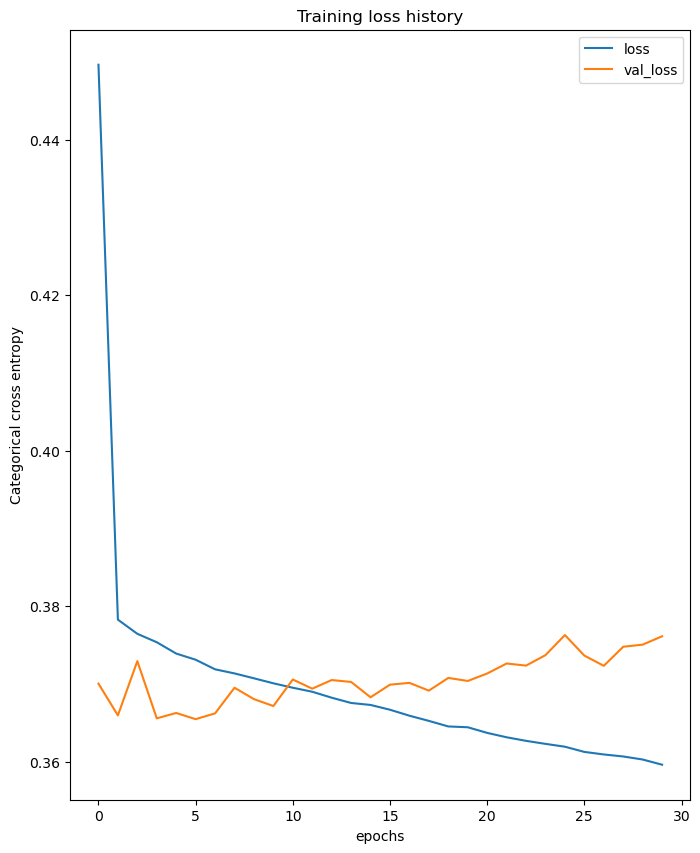

In [85]:
train_crash_history = pd.DataFrame(history_crash.history)
train_crash_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_crash_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

<Figure size 500x400 with 0 Axes>

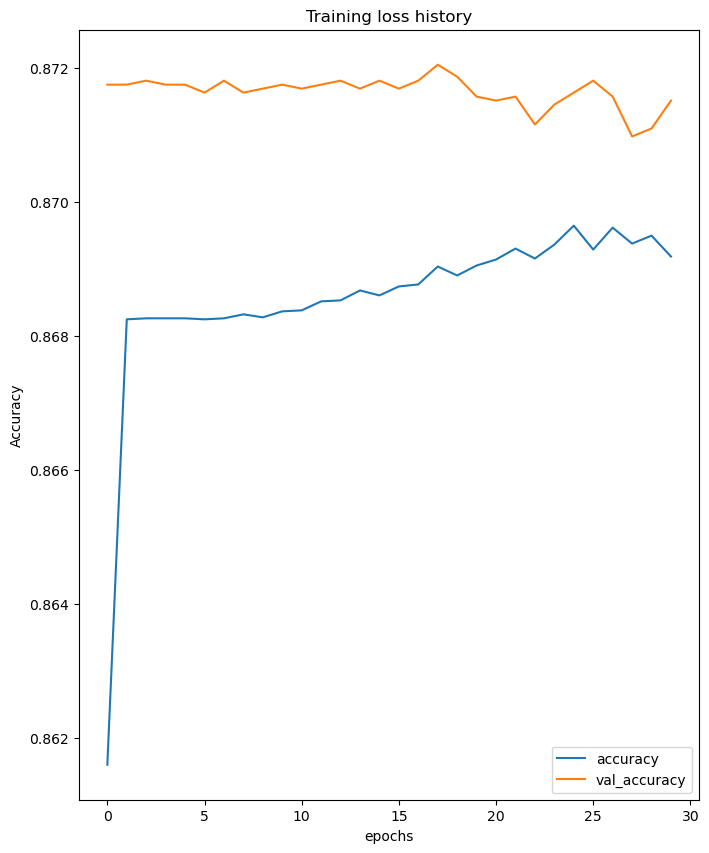

In [114]:
col_list = ['accuracy', 'val_accuracy']
plt.figure(figsize=(5,4))
train_crash_history[col_list].plot()

plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

TensorFlow resulted with acurracy score 87

In [87]:
predicted = np.argmax(y_proba, axis=-1)
predicted

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

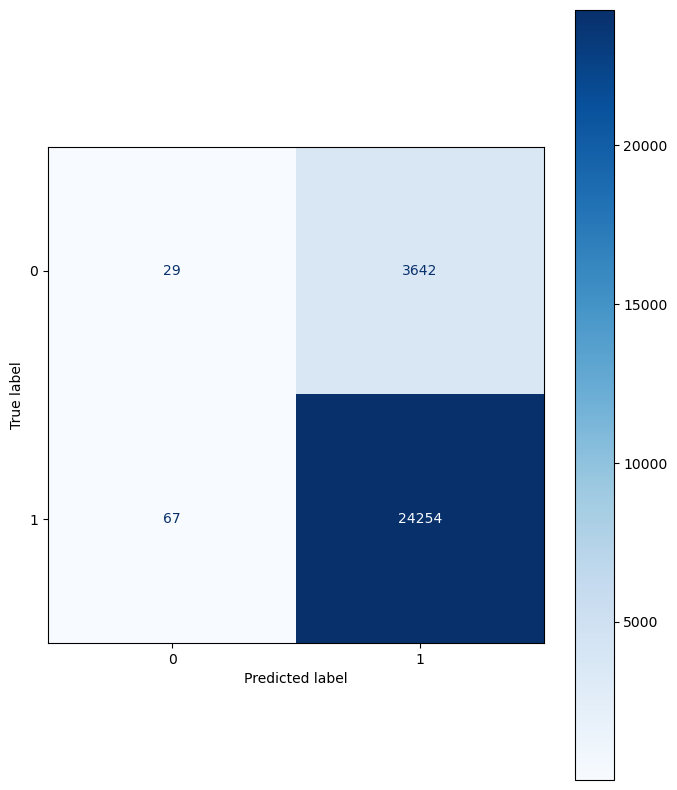

In [88]:
cm_digits = confusion_matrix(y_test3_proc, predicted)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_digits)

disp.plot(cmap=plt.cm.Blues)
plt.show()

## Conclusion:

1. Random Forest with whole Dataset, and Target with 3 classes 'NO_INJURY', 'NON_INCAP_INJURY', 'INCAP_INJURY' resulted with better accuracy score. Since class 'NO_INJURY' was around 86% of the dataset, we can say that major causes of 'NO_INJURY' incidents are Pedestrian/Bicyclist, Vehicle when parked, Sideswipe, while Turning and Rear-Ended. Incidents are happening in Traffic signal intersections, near Stop sign/Flashers, Traffic way Not divided and Traffic way with Median(No Barriers).

2. Handling class imbalance by choosing subset of Dataset which has 'MOST_SEVERE_INJURY' with values 'INCAP_INJURY' and 'NON_INCAP_INJURY', and using Oversampling SMOTE techniques and Gridsearch with tuned parameters. Results was showing the primary cause of crashes are Tailgating, Reckless Driving, Drunken Drivers, Wrong side/Way driving and Weather related. These incidents are recorded under "First_Crash_Type" as Rear_End, Pedestrian/Bicyclist, Vehicle Hit while parked, hitting Fixed Object, Turning and Headon Collision. Weather is also considered as factor, mostly occurred during Snow, Cloudy and Rain. And the lighting condition as Darkness with lighted roads, reason mostly is "Less Visibility considered as more risk". Vehicle damages are over 1,500 and in some scenarios with small vehicle damages 500-1500.

3. Finally, we checked Tensorflow model to find if we can get better results. Choosing 2 Hidden layers, activation function as sigmoid for binary classification target, optimizer Adam, loss as sparse_categorical_crossentropy, metrics accuracy, epochs 30 and validation size 0.2, we came up with same accuracy score 87. 